# COGS 108 - Gender Wage Gap Study

# Overview

The goal of our project is to determine if there's a significant gender wage gap in recent years. We will be looking at the US census dataset in 2019 in California. We first perfomed t-test to verify if there's a signifincat wage gap between male and female from the dataset. We then picked a few variables, education attainment, marital status, fertility rate, employment status, and age, to find if they are correlated with the wage gap. We are able to conclude that there's a significant gender wage gap in 2019 in California, and that the variables mentioned above are important factors in driving wage gap. We would like to generalize our research to worldwide gender wage gap situation. Since we only picked California residents, our analysis might not apply to worldwide population. 

# Names

- Yueyan Tang
- Hongxin Song
- Ruojia Tao
- Xiang Liu

<a id='research_question'></a>
# Research Question

Is there a wage gap between women and men? If there is, what are some of the variables that correlate to the wage gap? In particular, we'll look at variables such as age, education attainment, marital status, fertility rate, and employment status.

<a id='background'></a>

## Background & Prior Work

Background:

Women in the workforce have been treated differently from men historically. Such as employment, payment and promotion. In the US, although a lot of people try to improve the female’s situation in the workplace, there is still a large gap between female and male. For example, STEM was especially a male-dominated field. However, dramatic changes in gender inequality had happened in the last half century. Huge progress in achieving gender equality in the workplace has been made from 1970 to present. With movements such as the Paycheck Fairness Act, the Equal Employment Opportunity, the Let Girls Learn Initiative, and Women in STEM, the society strives to create a more inclusive and equal opportunity for all. Though efforts were made in different social factors, we are interested in investigating if there’s still a wage gap in employment. We are interested in learning how different social factors, such as the female educational attainment, marriage and pregnancy, and employment status have affected the wage gap in some way.
 
Prior Work:

Gender Wage Gap:

The difference between male and female median wages still exists. According to a 2021 study on the past gender wage gaps, “women in Southern Europe earned approximately half of the men who are equally or less skilled” (Bleiweis, 2020). From the 1960s to the 1990s, the gender wage difference “dropped drastically” due to political movements worldwide (England, Paula, et al, 2020). Today world leaders push to advocate policies such as the Fair Pay Act to further reduce the gender wage gap to create a more inclusive environment. 
 
Education Rate:

For a while, women were not able to attend universities, which restricted them from gaining a higher education and a professional job. However, as society developed, women have been granted equal access. According to the United States Census Bureau, between 2000 and 2019, educational attainment rates increased significantly for both genders. Overall, a higher percentage of bachelor’s degrees were awarded to females than to males in 2015–16 (58 vs. 42 percent). However, in STEM fields, a lower percentage of bachelor’s degrees were awarded to females than to males (36 vs. 64 percent). This pattern—in which females received higher percentages of bachelor’s degrees overall but lower percentages of bachelor’s degrees in STEM fields—was observed across all racial/ethnic groups (NCES, 2019).
 
Marriage And Pregnancy:

Marriage and Birth-giving have been major factors affecting women’s employment. Traditionally, there are a lot of women who choose to stay at home as housewives after marriage. There are also numeric cases that women get married and pregnant at a rather young age, causing the lack of chance to work.  From 2000-2016, there was a rise in the first marriage age of women (OECD, 2020). Usually, having a child takes up a lot of time and attention from women and there are women who choose to give up work for their children. Thus, changes happened in women’s marriage age and pregnant age could be correlated to the employment rate.


References (include links):
- 1)England, Paula, et al. “Progress toward Gender Equality in the United States Has Slowed or Stalled.” PNAS, National Academy of Sciences, 31 Mar. 2020, www.pnas.org/content/117/13/6990. 
- 2)“Overview.” U.S. Equal Employment Opportunity Commission, www.eeoc.gov/overview#:~:text=The%20U.S.%20Equal%20Employment%20Opportunity,national%20origin%2C%20age%20(40%20or. 
- 3)“Fast Facts: Science, Technology, Engineering, and Mathematics (STEM) Education, by Gender (899).” Nces.Ed.Gov, 2019, nces.ed.gov/fastfacts/display.asp?id=899.
- 4)Bleiweis, Robin. “Quick Facts About the Gender Wage Gap.” Center for American Progress, www.americanprogress.org/issues/women/reports/2020/03/24/482141/quick-facts-gender-wage-gap/. 
- 5)“Development.” OECD, www.oecd.org/gender/data/development/.

# Hypothesis


We hypothesize that there is a significant gender wage gap. Some social factors that are associated with the gender wage gap are education attainment, marital status, fertility rate and age.

# Dataset

*Fill in your dataset information here*

- Dataset Name:ACS 1-year PUMS report 2019
- Link to the dataset: https://www2.census.gov/programs-surveys/acs/data/pums/2019/1-Year/
- Number of observations: 313498

This dataset has 313498 individual observations with 288 columns, we care about the variables gender, income, employment status, marital status, fertility rate, and education attainment in 2019 in California.The dataset does not contain any personal information that could disclose the identity of the person being surveyed. 



# Setup

In [2]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, chi2_contingency

# Data Cleaning

Since this dataset is from an offical source, data standardization is already done. Therefore we don't have to worry about different format as the input has already been cleaned. 

Also, we are going to see some basic informations and values in the dataset to help us better understand the dataset.

## 3.1 Import dataset

In [3]:
ca2019 = pd.read_csv('psam_p06.csv')
# Check out the data
ca2019.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2019GQ0000003,9,1,3704,4,6,1010145,21,58,...,0,40,0,20,41,40,41,21,0,2
1,P,2019GQ0000009,9,1,7322,4,6,1010145,34,66,...,62,58,33,7,59,7,34,34,32,34
2,P,2019GQ0000013,9,1,5904,4,6,1010145,28,18,...,27,27,49,49,7,27,27,29,6,5
3,P,2019GQ0000023,9,1,7107,4,6,1010145,127,58,...,117,234,226,135,210,217,128,116,125,21
4,P,2019GQ0000024,9,1,8900,4,6,1010145,103,18,...,180,22,104,104,100,182,24,103,103,23


In [4]:
# We are only interested in the following columns, and we need to get rid of the SERIALNO for potential privacy issues 
ca2019 = ca2019[['AGEP', 'WAGP', 'ESR', 'FER', 'SEX', 'MAR', 'SCHL', 'SOCP']]
# Renaming the columns of the dataframe
ca2019.columns = ['Age', 'Income', 'Employment Status', 'New Born Baby', 
                  'Gender', 'Marriage Status', 'Highest Education Level', 'Current Occupation']

## 3.2 Check for missing data

In [5]:
# Check if the dataset has any missing information
ca2019.isnull().sum()

Age                             0
Income                      61876
Employment Status           66593
New Born Baby              292870
Gender                          0
Marriage Status                 0
Highest Education Level     10824
Current Occupation         155565
dtype: int64

Since our research is relative to income employment status and education level, we have to drop that have missing data in any of these columns. 

In [6]:
# Consider drop the rows with NaN value for the columns Income, Employment Status and Highest Education Level
ca2019.dropna(inplace=True, subset = ['Income', 'Employment Status', 'Highest Education Level'])
null_rows = ca2019.isnull().any(axis=1)
ca2019 = ca2019.fillna(-1)
ca2019.isnull().sum()

Age                        0
Income                     0
Employment Status          0
New Born Baby              0
Gender                     0
Marriage Status            0
Highest Education Level    0
Current Occupation         0
dtype: int64

In [7]:
ca2019.head()

,Age,Income,Employment Status,New Born Baby,Gender,Marriage Status,Highest Education Level,Current Occupation
0,58,23100.0,3.0,-1.0,2,5,18.0,533054
1,66,0.0,6.0,-1.0,1,3,16.0,-1
2,18,6000.0,6.0,2.0,2,5,16.0,353031
3,58,0.0,6.0,-1.0,1,5,13.0,-1
4,18,2000.0,6.0,2.0,2,5,16.0,399032


## 3.3 Data description and subsetting

In [8]:
ca2019.describe()

,Age,Income,Employment Status,New Born Baby,Gender,Marriage Status,Highest Education Level
count,313498.000000,313498.000000,313498.000000,313498.000000,313498.000000,313498.000000,313498.000000
mean,47.860592,37599.534255,3.033662,-0.200403,1.510364,2.616935,17.896357
std,19.312345,69414.602347,2.402319,1.316434,0.499893,1.804789,4.360086
min,16.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
25%,31.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,16.000000
50%,48.000000,10000.000000,1.000000,-1.000000,2.000000,1.000000,19.000000
75%,63.000000,50000.000000,6.000000,2.000000,2.000000,5.000000,21.000000
max,94.000000,571000.000000,6.000000,2.000000,2.000000,5.000000,24.000000


In [9]:
ca2019.shape

(313498, 8)

In [10]:
# subsetting the dataframe to female and male
ca2019female = ca2019[ca2019["Gender"]== 2]
ca2019male = ca2019[ca2019['Gender']==1]

## 3.4 Summary of education attainment rate by gender (bar chart) ##

In [11]:
# We want to find the proportion of women receiving college or ablove education
# From the Codebook, we also know that 21 means Bachelor's degree and we want to know that the percentage
# of women receiving college degrees or higher. 
collegefemale2019 = ca2019female[ca2019female['Highest Education Level'] >= 21]
collegerateFe_2019 = len(collegefemale2019)/len(ca2019female)
collegerateFe_2019

0.3462918286478581

In [12]:
# We also calculated the percentage for males 
collegemale2019 = ca2019male[ca2019male['Highest Education Level'] >= 21]
collegerateMa_2019 = len(collegemale2019)/len(ca2019male)
collegerateMa_2019

0.33370032573289904

## 3.5 Summary of marital status by gender (bar chart)

In [13]:
#Marriage rate for females in 2019
marriedfemale2019 = ca2019female[ca2019female['Marriage Status'] == 1]
marriagerateFe_2019 = len(marriedfemale2019)/len(ca2019female)
marriagerateFe_2019

0.48864985812322653

In [14]:
#Marriage rate for males in 2019
marriedmale2019 = ca2019male[ca2019male['Marriage Status'] == 1]
marriagerateMa_2019 = len(marriedmale2019)/len(ca2019male)
marriagerateMa_2019

0.5176547231270359

## 3.6 Summary of fertility rate in the past year for female ##

In [15]:
#The rate of giving birth in 2019
babyfemale2019 = ca2019female[ca2019female['New Born Baby'] == 1]
birthrateFe_2019 = len(babyfemale2019)/len(ca2019female)
birthrateFe_2019

0.025906573832172902

## 3.7 Summary of employment status in the STEM field by gender(bar chart) ##

In [16]:
## By engineering
ca2019femaleengineer = ca2019female['Current Occupation'].str.startswith('171').value_counts()
ca2019maleengineer = ca2019male['Current Occupation'].str.startswith('171').value_counts()
## By computer science
ca2019femalecomputersci = ca2019female['Current Occupation'].str.startswith('151').value_counts()
ca2019malecomputersci = ca2019male['Current Occupation'].str.startswith('151').value_counts()
## By medical 
ca2019femalemedical = ca2019female['Current Occupation'].str.startswith('291').value_counts()
ca2019malemedical= ca2019male['Current Occupation'].str.startswith('291').value_counts()
## By STEM
stemFe2019 = ca2019femaleengineer[1] + ca2019femalecomputersci[1] + ca2019femalemedical[1]
stemMa2019 = ca2019maleengineer[1] + ca2019malecomputersci[1] + ca2019malemedical[1]
### Compare the female stem_rate with male stem_rate. 
stem_rate_f2019 = stemFe2019/len(ca2019female)
stem_rate_m2019 = stemMa2019/len(ca2019male)
stem_rate_f2019/stem_rate_m2019

0.8716666472193072

## 3.8 Summary of income data (mean, median, standard deviation) by gender (histogram)

In [17]:
# We are only interested in people that reported some sort of the income, it wouldn't make sense for us to
# include people that reported 0 on their income in 2019
ca2019maleincome = ca2019male[ca2019male['Income']!= 0]
ca2019femaleincome = ca2019female[ca2019female['Income']!= 0]

In [18]:
# We can see from the graph that the average income for males in 2019 is around $74518
ca2019maleincome.describe()

,Age,Income,Employment Status,New Born Baby,Gender,Marriage Status,Highest Education Level
count,97083.000000,97083.000000,97083.000000,97083.0,97083.0,97083.000000,97083.000000
mean,42.310837,74518.913754,1.362607,-1.0,1.0,2.655861,18.355191
std,14.850145,92552.590990,1.175352,0.0,0.0,1.884153,4.039762
min,16.000000,4.000000,1.000000,-1.0,1.0,1.000000,1.000000
25%,30.000000,23000.000000,1.000000,-1.0,1.0,1.000000,16.000000
50%,41.000000,48000.000000,1.000000,-1.0,1.0,1.000000,19.000000
75%,54.000000,93000.000000,1.000000,-1.0,1.0,5.000000,21.000000
max,94.000000,571000.000000,6.000000,-1.0,1.0,5.000000,24.000000


In [19]:
# We can see from the graph that the average income for males in 2019 is around $52318
ca2019femaleincome.describe()

,Age,Income,Employment Status,New Born Baby,Gender,Marriage Status,Highest Education Level
count,87022.000000,87022.000000,87022.000000,87022.000000,87022.0,87022.000000,87022.000000
mean,42.171003,52318.483671,1.367907,1.009342,2.0,2.727873,18.860587
std,14.802326,62950.144748,1.202625,1.388760,0.0,1.826392,3.642400
min,16.000000,4.000000,1.000000,-1.000000,2.0,1.000000,1.000000
25%,30.000000,15000.000000,1.000000,-1.000000,2.0,1.000000,17.000000
50%,41.000000,35000.000000,1.000000,2.000000,2.0,2.000000,20.000000
75%,54.000000,70000.000000,1.000000,2.000000,2.0,5.000000,21.000000
max,94.000000,571000.000000,6.000000,2.000000,2.0,5.000000,24.000000


The average income for females in 2019 is around $52318 which is considerably lower than the male counterpart

## 3.9 Summary of age (range) by gender (histogram) 

### Extract male age and female age

In [20]:

ca2019maleage = ca2019male['Age']
ca2019femaleage = ca2019female['Age']
ca2019maleage.describe()

count    153500.000000
mean         46.873870
std          18.983339
min          16.000000
25%          31.000000
50%          46.000000
75%          62.000000
max          94.000000
Name: Age, dtype: float64

In [21]:
ca2019femaleage.describe()

count    159998.000000
mean         48.807241
std          19.576174
min          16.000000
25%          32.000000
50%          49.000000
75%          64.000000
max          94.000000
Name: Age, dtype: float64

### There isn't any significant difference for the age by gender

# Data Analysis & Results

In this step we start explore our data:
- what is the relationship of incomes between women and male who have educational level.

We start from visualized the data of female.

Plot a bar chart showing the number of women in each educational level 

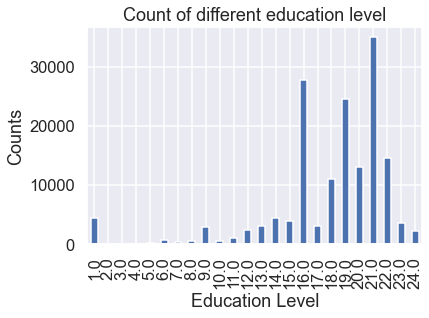

In [22]:
##visualize educationa levels of women
ca2019female['Highest Education Level'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.title('Count of different education level')
f1 = plt.gcf()

We visualize the distribution of education level here. We can see the spread of Education level is mainly a skewed left here. The most of people is at the 16-22, which means most people are from high school diploma to Master's degree.

To find the relationship between income of female who have high education level, we plot a histogram of the income data for all women who have Bachlor's degree or higher

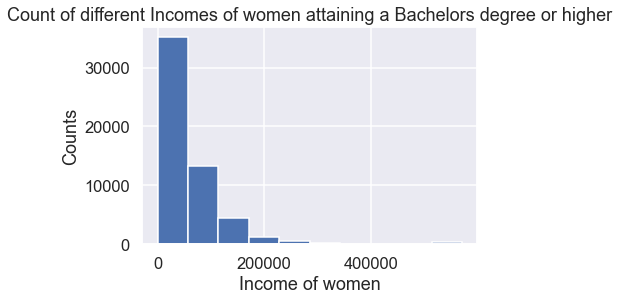

In [23]:
plt.hist(ca2019female.loc[ca2019female['Highest Education Level'] >= 21].Income)
plt.xlabel('Income of women')
plt.ylabel('Counts')
plt.title('Count of different Incomes of women attaining a Bachelors degree or higher')
f2 = plt.gcf()

We look at the income of female attaining a Bachelors degree or higher. We find out that the spread of income of women attaining a Bachelors degree or higher is skewed right.

In [24]:
ca2019female[ca2019female['Highest Education Level'] >= 21].describe()

,Age,Income,Employment Status,New Born Baby,Gender,Marriage Status,Highest Education Level
count,55406.000000,55406.000000,55406.000000,55406.000000,55406.0,55406.000000,55406.000000
mean,48.686261,52242.806736,2.608779,0.670541,2.0,2.286124,21.517128
std,16.975450,73606.529073,2.290357,1.469566,0.0,1.696730,0.792156
min,19.000000,0.000000,1.000000,-1.000000,2.0,1.000000,21.000000
25%,34.000000,0.000000,1.000000,-1.000000,2.0,1.000000,21.000000
50%,47.000000,30000.000000,1.000000,2.000000,2.0,1.000000,21.000000
75%,62.000000,80000.000000,6.000000,2.000000,2.0,4.000000,22.000000
max,94.000000,571000.000000,6.000000,2.000000,2.0,5.000000,24.000000


We also checked the table value in the describe table of income of female attaining a Bachelors degree or higher. We noticed that there is more than 25% of people with income 0. There is too many people with income 0. Maybe they are not included in the work force.

### Plot a histogram of the income data for all women who have Bachlor's degree or higher and in workforce

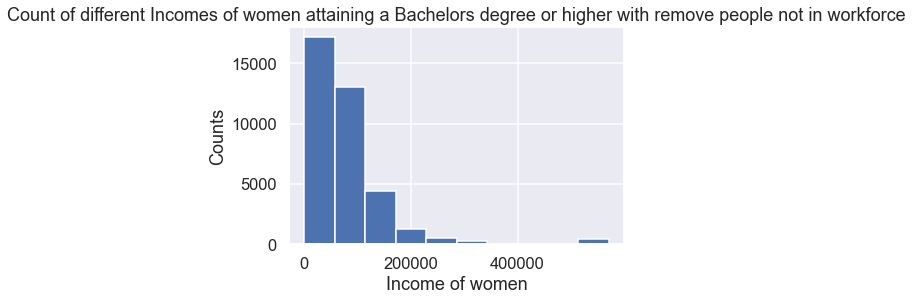

In [25]:
plt.hist(ca2019female.loc[(ca2019female['Highest Education Level'] >= 21) & (ca2019female['Employment Status'] != 3) & (ca2019female['Employment Status'] != 6) ].Income)
plt.xlabel('Income of women')
plt.ylabel('Counts')
plt.title('Count of different Incomes of women attaining a Bachelors degree or higher with remove people not in workforce')
f3 = plt.gcf()

We add a new filter here and removed the people out of work force to make the graph more reasonable. We see that the graph is still skewed right but not as much as the previous one. And the percentage of the sceond bar increased. We can also see some outliers exist here.

After finish analyze the female, we go to male's part. We plot a histogram of the income data for all men who have Bachlor's degree or higher.

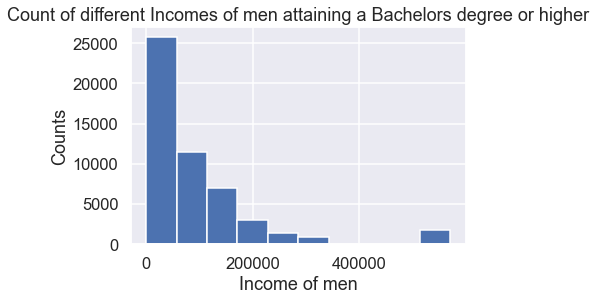

In [26]:
plt.hist(ca2019male.loc[ca2019male['Highest Education Level'] >= 21].Income)
plt.xlabel('Income of men')
plt.ylabel('Counts')
plt.title('Count of different Incomes of men attaining a Bachelors degree or higher')
f4 = plt.gcf()

### Now we do the same thing for male. We plot the count of different Incomes of men attaining a Bachelors degree or higher.

In [27]:
ca2019male[ca2019male['Highest Education Level'] >= 21].describe()

,Age,Income,Employment Status,New Born Baby,Gender,Marriage Status,Highest Education Level
count,51223.000000,51223.000000,51223.000000,51223.0,51223.0,51223.000000,51223.000000
mean,50.346016,86931.738086,2.270738,-1.0,1.0,2.212502,21.603850
std,17.204874,116339.228574,2.124449,0.0,0.0,1.737722,0.889324
min,19.000000,0.000000,1.000000,-1.0,1.0,1.000000,21.000000
25%,36.000000,0.000000,1.000000,-1.0,1.0,1.000000,21.000000
50%,49.000000,56000.000000,1.000000,-1.0,1.0,1.000000,21.000000
75%,64.000000,120000.000000,3.000000,-1.0,1.0,5.000000,22.000000
max,94.000000,571000.000000,6.000000,-1.0,1.0,5.000000,24.000000


### We check the desribe table for men there is still more than 25% percent zero for male.

In [28]:
ca2019male[(ca2019male['Highest Education Level'] >= 21) & (ca2019male['Employment Status'] != 3) 
           & (ca2019male['Employment Status'] != 6)].describe()

,Age,Income,Employment Status,New Born Baby,Gender,Marriage Status,Highest Education Level
count,37711.000000,37711.000000,37711.000000,37711.0,37711.0,37711.000000,37711.000000
mean,45.116969,115665.365543,1.036355,-1.0,1.0,2.263981,21.600488
std,13.838768,121574.699248,0.278418,0.0,0.0,1.782551,0.889029
min,19.000000,0.000000,1.000000,-1.0,1.0,1.000000,21.000000
25%,33.000000,40000.000000,1.000000,-1.0,1.0,1.000000,21.000000
50%,44.000000,87000.000000,1.000000,-1.0,1.0,1.000000,21.000000
75%,56.000000,146500.000000,1.000000,-1.0,1.0,5.000000,22.000000
max,94.000000,571000.000000,4.000000,-1.0,1.0,5.000000,24.000000


Here is the describe table after we remove the people not in work force. Now we check the 25% is no more 0. We removed a lot of people who is not in work force to make our data less skewed.

Plot a histogram of the income data for all men who have Bachlor's degree or higher and in workforce

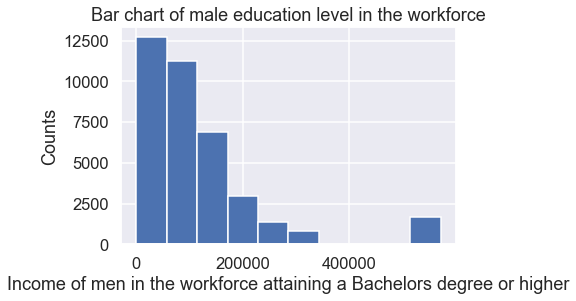

In [29]:
plt.hist(ca2019male.loc[(ca2019male['Highest Education Level'] >= 21) & (ca2019male['Employment Status'] != 3) & (ca2019male['Employment Status'] != 6) ].Income)
plt.xlabel('Income of men in the workforce attaining a Bachelors degree or higher')
plt.ylabel('Counts')
plt.title('Bar chart of male education level in the workforce')
f5 = plt.gcf()

According to the graph we can roughly see that there is less male at the lowest pay than female.

## 4.1 Normality test for numerical variables

In [30]:
## for age
age = ca2019['Age']
st_age, p_age = normaltest(age)

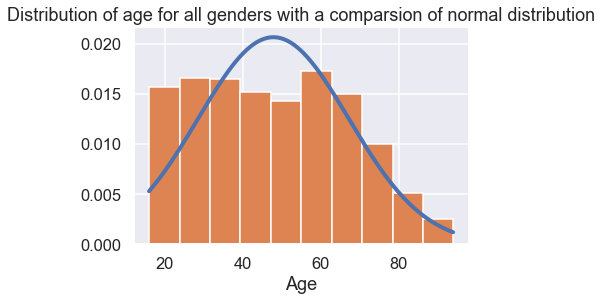

In [31]:
xs = np.arange(age.min(), age.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(age), np.std(age))
# most easily done using matplotlib
plt.xlabel('Age')
plt.title('Distribution of age for all genders with a comparsion of normal distribution')
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(age, density = True, label = 'Actual Data');

We first check if the age spread ages for all gender. The age is  near the normal distribution.

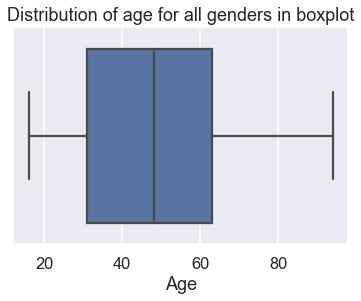

In [32]:
plt.title('Distribution of age for all genders in boxplot')
sns.boxplot(age)

 The box plot has the similar representation with histogram.

In [33]:
## for income
income = ca2019['Income']
logincome = np.log10(ca2019['Income'])
st_income, p_income = normaltest(income)

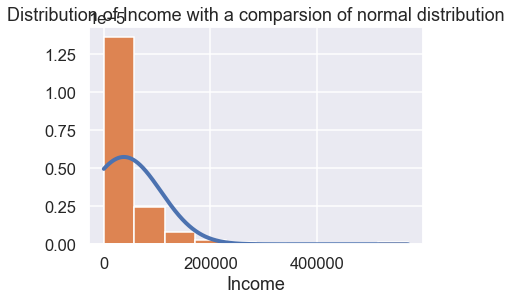

In [34]:
xs = np.arange(income.min(), income.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(income), np.std(income))
# most easily done using matplotlib
plt.xlabel('Income')
plt.title('Distribution of Income with a comparsion of normal distribution')
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(income, density = True, label = 'Actual Data');

We also checked if the Income is a normal distribution. It the graph we see here, there is a lot of low inome people which makes the graph extremely skewed right.

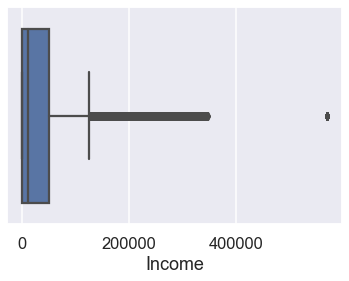

In [35]:
sns.boxplot(income)

The boxplot show the similar result here, main part of the income is near zero, while there is several outliers.

In [36]:
ca2019.sort_values('Income', ascending=False)[0:200]

,Age,Income,Employment Status,New Born Baby,Gender,Marriage Status,Highest Education Level,Current Occupation
357785,39,571000.0,1.0,2.0,2,5,21.0,412031
183975,34,571000.0,1.0,-1.0,1,1,22.0,291126
100349,49,571000.0,1.0,-1.0,1,1,22.0,413091
129538,52,571000.0,1.0,-1.0,1,1,23.0,291210
100357,51,571000.0,1.0,-1.0,1,1,21.0,151299
...,...,...,...,...,...,...,...,...
315197,68,571000.0,1.0,-1.0,1,1,24.0,291210
79319,43,571000.0,1.0,2.0,2,1,23.0,291210
369600,59,571000.0,1.0,-1.0,1,1,20.0,151251
79318,41,571000.0,1.0,-1.0,1,1,23.0,291210


We check the  value of outlier income. Thers is a lot of people that have really extreme income which may influence our analysis.

The distribution of age is approximately normal with a bell-curved shape. The distribution of income is right skewed, and does not have a normal distribution.

## 4.2 Outliers observed from the histogram and are 2 standard deviations from the mean

Since we see some outliers that may influence our analyze, we want to drop them.

In [37]:
ca2019income = ca2019[ca2019['Income']!= 0]
### find the 3 standard deviation distance from the mean for income
incomesum = ca2019income['Income'].describe()
outliercutlower = incomesum[1] - 3*incomesum[2]
outliercutupper = incomesum[1] + 3*incomesum[2]
### filter out outliers
ca2019new = ca2019income[(ca2019income['Income']< outliercutupper) & (ca2019['Income']> outliercutlower) ]
incomenew = ca2019new['Income']

## 4.3 Descriptive stats for income after filtering out outliers.

In [38]:
# mean median sd
ca2019new['Income'].describe()

count    181169.000000
mean      56378.280997
std       53213.840522
min           4.000000
25%       19000.000000
50%       40000.000000
75%       80000.000000
max      306000.000000
Name: Income, dtype: float64

In [39]:
ca2019new.median()

Age                           41.0
Income                     40000.0
Employment Status              1.0
New Born Baby                 -1.0
Gender                         1.0
Marriage Status                1.0
Highest Education Level       19.0
dtype: float64

We should note that since the income variable is heavily skewed to the right, we should use median, instead of mean to measure the central tendency of the variable. However, we should also notice that the population might include infants and underage children who are not eligible to work. Hence we do the same analysis with income $0 removed. 

After removing the outliers and 0 income, we have a more bell-curved like distribution (shown in 4.4). We have a mean of 56378 for all workers in California in 2019, and a median of 40000. We'll use 50000 as the number to separate categories for income in later analysis, since it's a compromise between the median and the mean. 

The reason we remove those outliers is that they do not correctly reflect the distribution of incomes of average people. 

## 4.4 Check for normality again to see if removing outliers affect the distribution

### Check for histogram and density curve

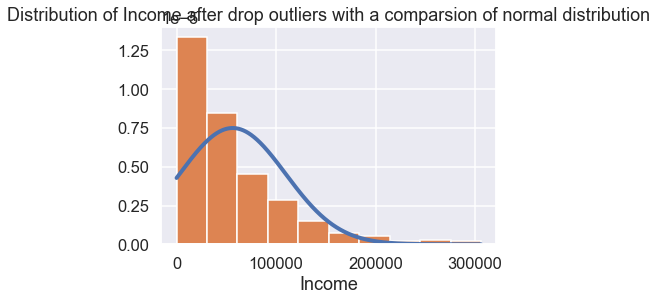

In [40]:
xs = np.arange(incomenew.min(), incomenew.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(incomenew), np.std(incomenew))
# most easily done using matplotlib
plt.xlabel('Income')
plt.title('Distribution of Income after drop outliers with a comparsion of normal distribution')
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(incomenew, density = True, label = 'Actual Data');

We drop the outliers and the graph is less skewed than before, but still shewed right.

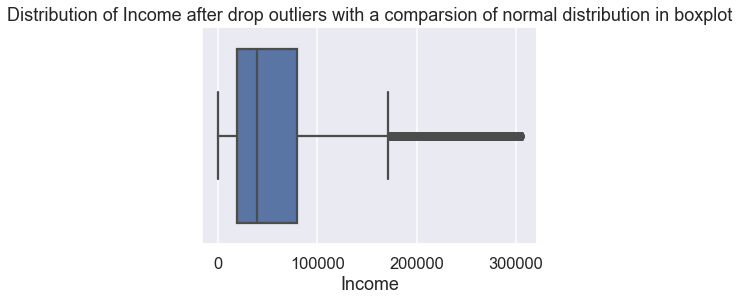

In [41]:
plt.title('Distribution of Income after drop outliers with a comparsion of normal distribution in boxplot')
sns.boxplot(incomenew)

Compared to the curves and boxplot we got in 4.1, we could see that the outliers are removed, and that the distribution of income resembles roughly a bell-shaped curve. But it is still skewed right.

## 4.5 Is the wage gap significant?

In [42]:
ca2019.groupby(['Gender'])['Income'].mean()

Gender
1    47130.421524
2    28455.724984
Name: Income, dtype: float64

$H_0: \bar x_{Male Wage} = \bar y_{Female Wage}$

$H_a: \bar x_{Male Wage} \ne \bar y_{Female Wage}$

### 4.5.1 T test between means of male wage and female wage 

Now, we want to use t test to see if the wage gap between male and female is caused by chance or not.

In [43]:
group1 = np.array(ca2019female.dropna()['Income'].tolist())
group2 = np.array(ca2019male['Income'].tolist())
ca2019femalework = ca2019female[ca2019female.Income != 0]
ca2019malework = ca2019male[ca2019male.Income != 0]

In [44]:
# t test of average wage attained by men and women in the workforce
ttest_ind(ca2019femalework['Income'], ca2019malework['Income'])

Ttest_indResult(statistic=-59.49216629300448, pvalue=0.0)

In [45]:
#t test of average wage attained by men and women
ttest_ind(group1, group2)

Ttest_indResult(statistic=-75.99054108354194, pvalue=0.0)

Since our p-values of wages of men and women are very small, we conclude that we could reject the null hypothesis and conclude that there is a significant difference in male and female wages. 

After proving that the wage gap between female and male is not caused by chance, we want to know what is the reason behind this phenomenon.

## 4.6 What role does education attainment play in wage gap?

Our first guess is the unbalence between education level:
- The male may have higher average education level than female which could be the cause of wage gap.

In [46]:
wage_edu=ca2019[['Highest Education Level','Income','Gender']]
wage_edu=wage_edu[wage_edu.Income != 0]

### Female education attainment and wage

In [47]:
wage_eduFe = wage_edu[wage_edu['Gender']==2]
edu_wage_groupFe=wage_eduFe.groupby(['Highest Education Level'])['Income'].mean()
edu_wage_groupFe=pd.DataFrame(edu_wage_groupFe)
edu_wage_groupFe.reset_index(inplace=True)
edu_wage_groupFe.head()

,Highest Education Level,Income
0,1.0,24567.925446
1,2.0,54706.666667
2,3.0,18833.333333
3,4.0,18944.827586
4,5.0,18368.000000


### Male education attainment and wage

In [48]:
wage_eduMa = wage_edu[wage_edu['Gender']==1]
edu_wage_groupMa=wage_eduMa.groupby(['Highest Education Level'])['Income'].mean()
edu_wage_groupMa=pd.DataFrame(edu_wage_groupMa)
edu_wage_groupMa.reset_index(inplace=True)
edu_wage_groupMa.head()

,Highest Education Level,Income
0,1.0,36295.938841
1,2.0,42713.636364
2,3.0,40381.481481
3,4.0,30285.937500
4,5.0,31715.555556


### Co education attainment and wage 

In [49]:
edu_wage_group=wage_edu.groupby(['Highest Education Level'])['Income'].mean()
edu_wage_group=pd.DataFrame(edu_wage_group)
edu_wage_group.reset_index(inplace=True)
#edu_wage_group

Now, we plot the scatterplot of wage gap between men and women according to education level

Text(0.5, 1.0, 'Comparsion of income between female and male')

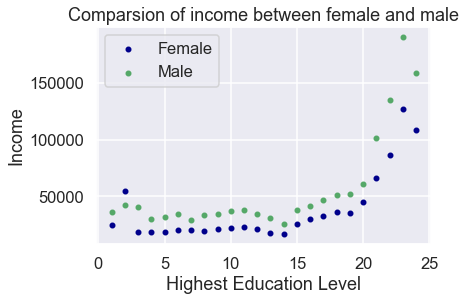

In [50]:
ax = edu_wage_groupFe.plot(kind='scatter',x='Highest Education Level', y='Income',
                          color = 'DarkBlue', label = 'Female')
ax1 = edu_wage_groupMa.plot(kind='scatter', x='Highest Education Level', y='Income', color='g', ax=ax, label = 'Male')
plt.title('Comparsion of income between female and male')

From this graph we can clearly see that almost at all the education level, the male's income is somehow higher than the female at the same education level. The gap of income between two genders is even larger with the high education level.

In [51]:
wage_edu=ca2019[['Gender','Highest Education Level','Income']]
wage_edu['Income Greater']=wage_edu['Income']>=50000

### 4.6.1 2x2 table, rows: educational level, columns: income >= 50000, income < 50000, use chi-squared test

H_0: No association between highest education attainment and incomes. 

H_a: There's some association between educational level and income. 

In [52]:
contigency= pd.crosstab(wage_edu['Highest Education Level'], wage_edu['Income Greater']) 
contigency.head()

Income Greater,False,True
Highest Education Level,,
1.0,7765,466
2.0,86,13
3.0,105,7
4.0,234,12
5.0,536,22


In [53]:
c, p, dof, expected = chi2_contingency(contigency) 
p

0.0

In [54]:
expected_table = pd.DataFrame(expected,\
                                        index = ['No schooling completed',
                                                'Nursery school, preschool', 'Kindergarten',
                                                'Grade 1', 'Grade 2','Grade 3','Grade 4','Grade 5','Grade 6',
                                                'Grade 7','Grade 8','Grade 9','Grade 10','Grade 11','Grade 12','High school',
                                                'GED', '<1yr college','>1yr college', 'Associates degree',
                                                'Bachelors degree', 'Masters degree', 'Professional degree beyond a bachelors degree',
                                                'Doctorate degree'],\
                                        columns = ['Less than 70000', 'More than 70000'])
expected_table.head()

,Less than 70000,More than 70000
No schooling completed,6103.817725,2127.182275
"Nursery school, preschool",73.414889,25.585111
Kindergarten,83.055228,28.944772
Grade 1,182.424877,63.575123
Grade 2,413.793013,144.206987


Since our p-value is extremely small (p <0.01), we could conclude that there is convincing evidence of an association between educational level and income. From our table we could see that people with some college education are more likely to have higher incomes. 

## 4.7 What role does marriage play in wage gap?

Marriage status is another reason we consider. Is the marraige status a factor influence the wage?

In [55]:
marraiage_wage=ca2019[['Marriage Status','Income']]
marraiage_wage.head()

,Marriage Status,Income
0,5,23100.0
1,3,0.0
2,5,6000.0
3,5,0.0
4,5,2000.0


In [56]:
marraiage_wage_group=marraiage_wage.groupby(['Marriage Status'])['Income'].mean()
marraiage_wage_group=pd.DataFrame(marraiage_wage_group)
marraiage_wage_group.reset_index(inplace=True)
marraiage_wage_group

,Marriage Status,Income
0,1,49108.323351
1,2,8737.567410
2,3,34713.014994
3,4,31863.104175
4,5,25978.866369


In [57]:
marraiage_wage['Income Greater']=marraiage_wage['Income']>=50000

### 4.7.1 2x2 table, rows: married and single, columns: income >= 50000, income < 50000, use chi-squared test

H_0: No association between marital status and incomes. 

H_a: There's some association between marital status and income. 

In [58]:
contingency1 = pd.crosstab(marraiage_wage['Marriage Status'], marraiage_wage['Income Greater'])
c, p, dof, expected = stats.chi2_contingency(contingency1)
p

0.0

In [59]:
expected_table1 = pd.DataFrame(expected,\
                                        index = ['Married',
                                                'Widowed', 'Divorced',
                                                'Separated', 'Never married'],\
                                        columns = ['Less than 50000', 'More than 50000'])
expected_table1

,Less than 50000,More than 50000
Married,116902.458698,40740.541302
Widowed,12705.966820,4428.033180
Divorced,22206.150135,7738.849865
Separated,3872.450025,1349.549975
Never married,76791.974322,26762.025678


Since our p-value is extremely small, we could conclude that there is convincing evidence of an association between marital status and income. From the table, we could see that married people are more likely to have higher incomes. 

## 4.8 What role does fertility rate play in wage gap?

Our third guess is about fertility rate. The born of baby could be the cause of wage change of female.

In [60]:
fertility_wage=ca2019[['New Born Baby','Income']]
fertility_wage=fertility_wage[fertility_wage['New Born Baby'] != -1]
fertility_wage

,New Born Baby,Income
2,2.0,6000.0
4,2.0,2000.0
15,2.0,0.0
20,2.0,3200.0
21,2.0,0.0
...,...,...
380069,2.0,30000.0
380079,2.0,24000.0
380085,2.0,0.0
380086,2.0,43600.0


In [61]:
fertility_wage_group=fertility_wage.groupby(['New Born Baby'])['Income'].mean()
fertility_wage_group=pd.DataFrame(fertility_wage_group)
fertility_wage_group.reset_index(inplace=True)
fertility_wage_group

,New Born Baby,Income
0,1.0,34759.727382
1,2.0,34396.008639


The incomes don't differ a lot by just eyeballing the statistics we have based on whether a female gave birth in the past year or not. 

## 4.9 What role does age play in wage gap?

The last check is about age. We think the people who is elder in the work place may get higher income.

In [62]:
ca2019[['Gender','Age','Income']].groupby(['Gender','Age']).mean()

Income
Gender Age             
1      16    372.596838
       17   1280.625254
       18   3078.573127
       19   6326.358426
       20   9212.325394
...                 ...
2      87    446.897810
       88    470.905923
       89    508.390805
       90    905.594406
       94    354.696970

[152 rows x 1 columns]

### 4.9.1 2x2 table, rows: age <65 and >=65, columns: income >= 50000, income < 50000, use chi-squared test

H_0: No association between people younger than the retirement age 65 and people are older than 65 and incomes. 

H_a: There's some association between age and income.

We choose to use 65 years old as the criteria as the retirement age is 65.

In [63]:
age_gender=ca2019[['Gender','Age','Income']]
age_gender['Age Greater']=age_gender['Age']>=65
age_gender['Income Greater']=age_gender['Income'] >= 50000
age_gender.head()

,Gender,Age,Income,Age Greater,Income Greater
0,2,58,23100.0,False,False
1,1,66,0.0,True,False
2,2,18,6000.0,False,False
3,1,58,0.0,False,False
4,2,18,2000.0,False,False


In [64]:
contingency2= pd.crosstab(age_gender['Age Greater'], wage_edu['Income Greater']) 
c, p, dof, expected = stats.chi2_contingency(contingency2)
p

0.0

In [65]:
expected_table2 = pd.DataFrame(expected,\
                                        index = ['< 65 yr',
                                                '>= 65 yr'],\
                                        columns = ['Less than 50000', 'More than 50000'])
expected_table2

,Less than 50000,More than 50000
< 65 yr,180471.595717,62894.404283
>= 65 yr,52007.404283,18124.595717


Since our p-value is extremely small, we could conclude that there is convincing evidence of an association between age and income. Just by eyeballing the table we have, people who are <65 yr, the retirement age, have a higher income than people who retired. 

For section 4.10-4.13, we are going to use the Kruskal-Wallis H-test for the samples using different variables. Since our numerical variable, income, is not normally distributed, the  Kruskal-Wallis H-test is suitable as it tests the null hypothesis that the population median, instead of the mean, of all the groups are equal. We will use a significance level of 0.05. 

In [66]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

## 4.10 Education Revisited

H_0: The population medians are equal across different education attainment groups. 

H_a: The population medians are not equal.

We look at three groups, group with a high school education but no degree, group with college education but no degree, and group with college degree and above.

In [67]:
#no high school diploma
wage_edu1 = wage_edu[wage_edu['Highest Education Level'] <= 15]['Income']
#no college degree
wage_edu2 = wage_edu[(wage_edu['Highest Education Level'] > 16) & (wage_edu['Highest Education Level'] <= 19)]['Income']
#some college degree and above
wage_edu3 = wage_edu[wage_edu['Highest Education Level'] > 19]['Income']

In [68]:
wage_edu1

3             0.0
9             0.0
10            0.0
13            0.0
28            0.0
           ...   
380082        0.0
380084    38000.0
380085        0.0
380087        0.0
380088        0.0
Name: Income, Length: 51009, dtype: float64

In [69]:
stat, p = kruskal(wage_edu1, wage_edu2, wage_edu3)
stat

27674.958198116474

In [70]:
p

0.0

Since our p-value is extremely small, we could conclude that there is convincing evidence of an association between education attainment and income. The Kruskal-Wallis H-test again confirms our conclusion earlier using the Chi-squared test.

## 4.11 Marital status Revisited

H_0: The population medians are equal across different marital status groups. 

H_a: The population medians are not equal.

We look at people who are married and people who are single.

In [71]:
#married
marriage_wage1 = marraiage_wage[marraiage_wage['Marriage Status']== 1]['Income']
#single
marriage_wage2 = marraiage_wage[(marraiage_wage['Marriage Status']== 2) |
                              (marraiage_wage['Marriage Status']== 3) |
                              (marraiage_wage['Marriage Status']== 4)]['Income']

In [72]:
stat, p = kruskal(marriage_wage1, marriage_wage2)
stat

6051.950960852627

In [73]:
p

0.0

Since our p-value is extremely small, we could conclude that there is convincing evidence of an association between marriage status and income. The Kruskal-Wallis H-test again confirms our conclusion earlier using the Chi-squared test.

## 4.12 Fertility Rate

H_0: The population medians are equal no matter people giving birth in the past year or not. 

H_a: The population medians are not equal.

In [74]:
### preganant in the last 12 month
fertility_wage1 = fertility_wage[fertility_wage['New Born Baby']==1]['Income']
### not pregnant in the last 12 month
fertility_wage2 = fertility_wage[fertility_wage['New Born Baby']==2]['Income']

In [75]:
stat, p = kruskal(fertility_wage1, fertility_wage2)

In [76]:
stat

10.121815649902985

In [77]:
p

0.0014652458700407333

Since our p-value is extremely small, we could conclude that there is convincing evidence of an association between fertility  rate and income. The Kruskal-Wallis H-test has a different test result from  the Chi-squared test. We would prefer to accept the Kruskal-Wallis H-test results as it is a rank-based test which is more suitable in our case since we have a right skewed dataset. 

## 4.13 Age Revisited

H_0: No association between people younger than the retirement age 65 and people are older than 65 and incomes. The population medians are equal. 

H_a: There's some association between age and income. The population medians are not equal.

We choose to use 65 years old as the criteria as the retirement age is 65.

In [78]:
### below retirement age
age_gender1 = age_gender[age_gender['Age'] <65 ]['Income']
### above retirement age
age_gender2 = age_gender[age_gender['Age'] >= 65 ]['Income']

In [79]:
stat, p = kruskal(age_gender1, age_gender2)
stat

49721.22930477215

In [80]:
p

0.0

Since our p-value is extremely small, we could conclude that there is convincing evidence of an association between age and income. The Kruskal-Wallis H-test confirms the result from the Chi-squared test. 

Summary: We found that there's indeed a significant difference between male wage and female wage by performing a t-test. We then investigated other possible factors that could cause the wage gap by using Chi-squared test and Kruskal-Wallis H test. In particular, we found that education, marital status, fertility rate, and age are four strong indicators of incomes. 

# Ethics & Privacy

The dataset we utilize in this project should be made available to the public with no additional personal information that would disclose any privacy information. In datasets that describe sensitive variables such as the educational rate, marriage and pregnancy, and gender wage gap, personally identifiable information should have been already removed. We would take extra effort to check and make sure that any information that may contain or disclose personal identity will be removed. 
 
We are not given the information of who and when had collected the data. Therefore there might be inherent bias during data collection. We are aware that our data won’t be perfect in the sense that there will be inconsistencies and missing data. Ethical challenges arise as we are embarking on a socially sensitive topic, and we are aware that this is a complicated issue which cannot be possibly explained by the three proposed factors. Our conclusions drawn from our analysis shouldn’t be used against any social groups.
 
Although our starting points come from the unequal treatment toward females, we will be neutral when we do the data analysis. We will also consider the probability that the situation of females has become better and better. We all know that the different groups in society try to make gender equity between two genders. There may be some changes in a female's working situation. 
 
We hope to raise social awareness of the gender wage gap in employment. We do not want this analysis to be used as a tool against any social groups in the society. We don’t want to set the different genders into the opposite position, but stand together to solve the social problem. 
 
The implications of our project is to inspire further research on the gender wage gap. There are many other social factors other than the ones we discussed in our research. We hope that in the future, more people will be involved in the research of the social factors affecting the gender wage gap, and to raise awareness of such issues, creating a more inclusive working environment for all social groups. 

# Conclusion & Discussion

The goal of our study is to find out if there’s a significant wage gap between male and female in recent years. We are also interested in looking at some of the social factors that are correlated with the wage gap. More specifically, we are looking at social factors such as education, marital status, fertility rate, and age. We are aware that we are embarking on a socially sensitive topic, which would have complications in different parts of the world. We choose to limit our scope to 2019 in California. Our dataset includes individual information on demographic features, which allows us to do inferential statistics to find out the relationship between variables. 

By performing t-test, we are able to conclude that there’s a significant gender wage gap in the dataset since the p-value is extremely small. By performing Chi-squared test and Kruskal-Wallis H test, we are able to conclude that the four variables are correlated to the wage gap as the p-values are extremely small.

We want to note that there are many other social factors that could contribute to the wage gap, such as race and parents’ education level. We are also aware that our research is only a start of the complicated social problems and that numbers alone are not enough to explain it. For example, we know that married people tend to have higher income than people who are single; people with higher education level tend to have higher income; people who gave birth in the past year tend to earn less; and that people who are younger than the retirement age tend to earn more. Some of them are results of more complicated social problems. For example, higher education levels could be caused by different styles of parenting, childhood trauma, and social environment. We hope that our research could raise social awareness of deeper social issues, and inspire other researchers to dig deeper into them.


# Team Contributions

- Hongxin Song is our background researcher collecting all the related information, while also contributing to the overall project in different ways. 
- Yueyan Tang is our group leader. She is responsible for the overall data analysis including Data cleaning, Wrangling and EDA. She also made the final project presentation. 
- Xiang Liu was our code expert and had been working on the python code section and incorporating all the parts into the final project. 
- Ruojia Tao was our visualization specialist and spent most of the time improving the readability of our graphs and adding descriptions. 